In [42]:
%reset -f
%reload_ext autoreload
%autoreload 2

import os
import sys
import importlib
import numpy as np
import pandas as pd

# === Setup ===
# Might need to change to main directory of MolFeatures
ROOT_DIR =   os.path.dirname(os.getcwd()) + '\\MolFeatures'
print(ROOT_DIR)
sys.path.append(ROOT_DIR)
sys.path.append(os.path.join(ROOT_DIR, 'M3_modeler'))
sys.path.append(os.path.join(ROOT_DIR, 'M2_data_extractor'))
sys.path.append(os.path.join(ROOT_DIR, 'utils'))

os.chdir(ROOT_DIR)  # Set working directory

# === Clear old module caches ===
for module in ['data_extractor', 'feather_extractor', 'gaussian_handler', 'help_functions', 'modeling', 'plot']:
    sys.modules.pop(module, None)

# === Safe Imports ===
try:

    from help_functions import dict_to_horizontal_df, get_df_from_file, pick_samples_to_remove_for_distribution, add_output_column_csv
    from modeling import (
        ClassificationModel,
        LinearRegressionModel,
        fit_and_evaluate_single_combination_regression,
        fit_and_evaluate_single_combination_classification
        
    )
    import plot
except ModuleNotFoundError as e:
    print(f"Module import failed: {e} \nPlease ensure all required modules are installed and available in the path specified on the right hand corner of the notebook.")

# === Config ===
pd.set_option('display.max_columns', None)



c:\Users\edens\Documents\GitHub\LabCode\MolFeatures


In the next part, an example file from directory modeling_example is used, but you can pick any csv, just specify the correct path.

**Note that you need to have an output column values in order to create a model, either add manually, or in target_csv_filepath enter the location of the output csv**

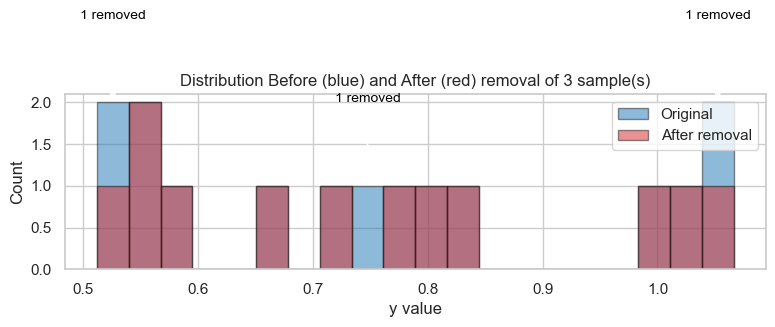

In [43]:

modeling_example_dir = os.path.join(ROOT_DIR,'modeling_example')
csv_path=os.path.join(modeling_example_dir, 'Linear_Dataset_Example.csv')
csv_filepaths = {
'features_csv_filepath': csv_path,
'target_csv_filepath': ''
}
features_df=pd.read_csv(csv_path, index_col=0)
y=features_df['output']
samples_to_remove = pick_samples_to_remove_for_distribution(y, n_remove=3)


Database already exists at: results_Linear_Dataset_Example.db
Table 'regression_results' has been ensured to exist.
linear model selected
Loaded CSV: c:\Users\edens\Documents\GitHub\LabCode\MolFeatures\modeling_example\Linear_Dataset_Example.csv
Names column: Unnamed: 0  |  Target column: output
Rows: 15
Features (total â kept numeric): 22 â 22


interactive(children=(FloatSlider(value=0.9, continuous_update=False, description='|r| ≥', max=1.0, step=0.01)…

--- Correlation Report ---
Features with |r| > 0.8:
['-1-2-', '-2-9-']
Initial VIF (top 10):
feature      VIF
  -2-9- 3.272834
  -1-2- 3.272834
No features exceeded the VIF threshold. No columns dropped.

----- Independence of Errors (Durbin-Watson) -----
Durbin-Watson statistic: 3.004
â ï¸ Possible autocorrelation in residuals.

----- Homoscedasticity (Breusch-Pagan Test) -----
Breusch-Pagan p-value: 0.957
â Homoscedasticity assumed (good).

----- Normality of Errors (Shapiro-Wilk Test) -----
Shapiro-Wilk p-value: 0.777
â Residuals appear normally distributed.

----- Normality of Errors (Q-Q Plot) -----


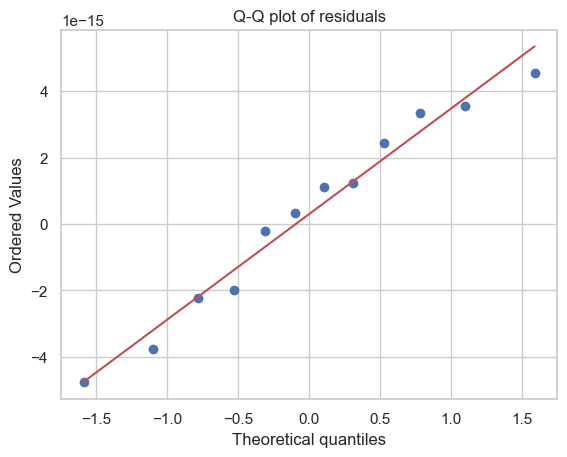

In [ ]:
# First Let's create the regression model
regression_model = LinearRegressionModel(csv_filepaths, process_method='one csv', output_name='output',
                                        leave_out=samples_to_remove, min_features_num=2,
                                        max_features_num=4, metrics=None, return_coefficients=False)

example use on a selected combination.

In [41]:
features=['-1-2-', 'Dist_1-2', 'Dist_16-17', 'dip_x']
plot.generate_and_display_single_combination_plot(regression_model, features)

Extracting features from model.features_df...
R2:0.904 Q2: 0.747, MAE: 0.086, RMSD: 0.096 for combination: ['-1-2-', 'Dist_1-2', 'Dist_16-17', 'dip_x']
Error during model fitting/prediction: 'scores'


Database does not exist. It will be created at: results_Train_simisampler_R.db
Table 'classification_results' has been ensured to exist.
Loaded CSV: c:\Users\edens\Documents\GitHub\LabCode\MolFeatures\modeling_example\Train_simisampler_R.csv
Names column: Unnamed: 0  |  Target column: class
Rows: 26
Features (total â kept numeric): 187 â 187

--- Correlation Report ---
Features with correlation above 0.8:
['vbur_qvtot_max_vburminconf', 'sterimol_B5_min', 'vbur_max_delta_qvbur_delta', 'vbur_ovtot_max_max', 'qpoletens_yy_max', 'sterimol_L_max', 'vbur_ovtot_max_boltz', 'pyr_P_min', 'vbur_vbur_boltz', 'vmin_r_boltz', 'Pint_dP_boltz', 'qpoletens_zz_vburminconf', 'flag', 'dipolemoment_delta', 'vbur_near_vtot_delta', 'sterimol_B1_min', 'spindens_P_rc_boltz', 'vbur_qvbur_max_min', 'nbo_bd_e_max_boltz', 'vbur_qvtot_min_max', 'vbur_vbur_max', 'vbur_near_vbur_min', 'vmin_vmin_boltz', 'vbur_ovtot_max_min', 'vbur_near_vtot_vburminconf', 'sterimol_burB1_vburminconf', 'sterimol_burB1_boltz', 'E_s

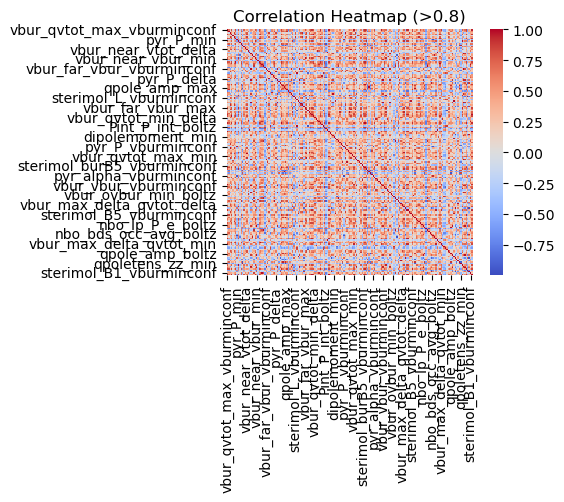


Correlated features were not dropped.

Loaded 0 existing results from the database.
Skipping 0 combinations already in the database.
Combos to run: 187, done_combos: 0


evaluation: 100%|██████████| 187/187 [00:04<00:00, 43.71it/s]


| formula                         |   accuracy |   precision |   recall |       f1 |   mcfaden |   avg_accuracy |     avg_f1 |   Model_id |
|:--------------------------------|-----------:|------------:|---------:|---------:|----------:|---------------:|-----------:|-----------:|
| ('nbo_P_rc_boltz',)             |   0.884615 |    0.886905 | 0.884615 | 0.884444 |  0.600906 |       0.846667 |   0.845714 |          0 |
| ('fukui_m_boltz',)              |   0.846154 |    0.846154 | 0.846154 | 0.846154 |  0.572223 |       0.813333 |   0.805    |          1 |
| ('spindens_P_rc_boltz',)        |   0.807692 |    0.809524 | 0.807692 | 0.807407 |  0.564566 |       0.813333 |   0.805    |          2 |
| ('fukui_p_boltz',)              |   0.730769 |    0.732143 | 0.730769 | 0.73037  |  0.459092 |     nan        | nan        |          3 |
| ('vbur_max_delta_qvbur_boltz',) |   0.807692 |    0.861111 | 0.807692 | 0.800307 |  0.416224 |     nan        | nan        |          4 |



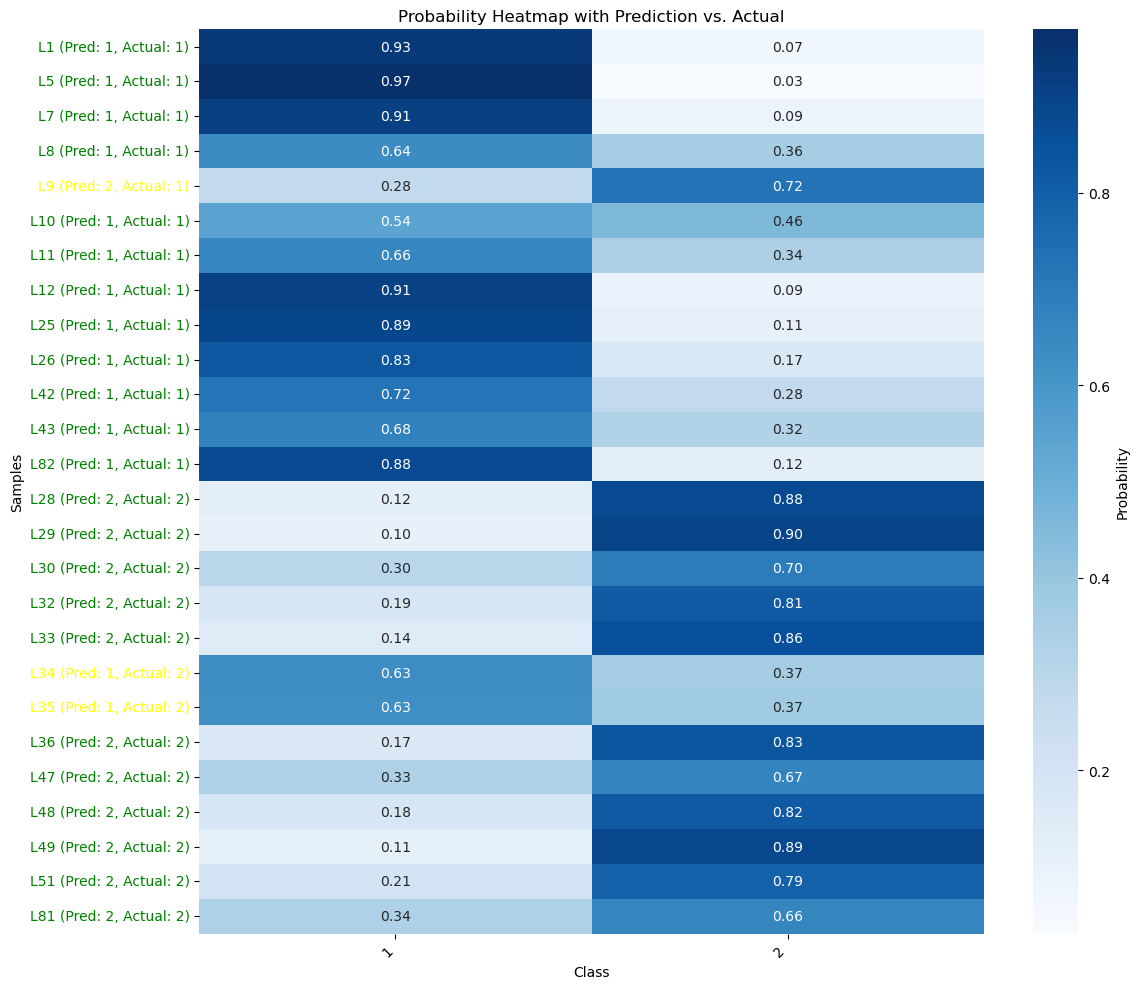





VIF Table

---

| variables      |   VIF |
|:---------------|------:|
| nbo_P_rc_boltz |   nan |

Confusion Matrix

Results saved to classification_results.txt in c:\Users\edens\Documents\GitHub\LabCode\MolFeatures


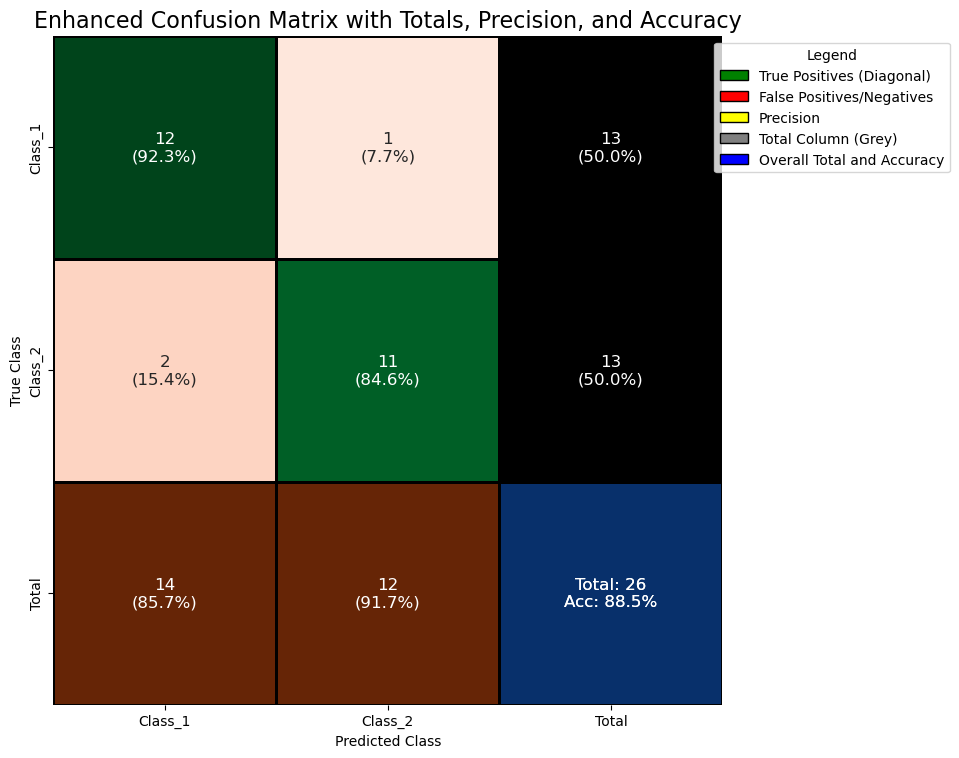

Exiting model selection.


,id,combination,accuracy,precision,recall,f1_score,mcfadden_r2,avg_mcfadden_r2,avg_accuracy,avg_f1_score,threshold
12,13,"('nbo_P_rc_boltz',)",0.884615,0.886905,0.884615,0.884444,0.600906,0.480132,0.846667,0.845714,0.5
40,41,"('fukui_m_boltz',)",0.846154,0.846154,0.846154,0.846154,0.572223,0.455802,0.813333,0.805000,0.5
13,14,"('spindens_P_rc_boltz',)",0.807692,0.809524,0.807692,0.807407,0.564566,0.449748,0.813333,0.805000,0.5
39,40,"('fukui_p_boltz',)",0.730769,0.732143,0.730769,0.730370,0.459092,NaN,NaN,NaN,0.5
110,111,"('vbur_max_delta_qvbur_boltz',)",0.807692,0.861111,0.807692,0.800307,0.416224,NaN,NaN,NaN,0.5


In [15]:

modeling_example_dir = os.path.join(ROOT_DIR,'modeling_example')
csv_path=os.path.join(modeling_example_dir, 'Train_simisampler_R.csv')
csv_filepaths = {
'features_csv_filepath': csv_path,
'target_csv_filepath': ''
}
classification_model= ClassificationModel(csv_filepaths, process_method='one csv', output_name='class',
                                        leave_out=None , min_features_num=1,
                                        max_features_num=1, metrics=None, return_coefficients=False)
classification_model.search_models(top_n=5,mcfadden_threshold=0.5)